import the necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Reading the data

In [2]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

Explore the Data

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# check the values of "Credit_History" column
df["Credit_History"].unique()

array([ 1.,  0., nan])

we need to change some columns data type like ( "Credit History" ) from float64 to object

In [7]:
df["Credit_History"] = df["Credit_History"].astype(object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [10]:
# checking for nulls 
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- we will fill the null values in "LoanAmount" column with the mean 
- and we will drop the rest null values in the other columns since they are Categorical columns

In [11]:
df["LoanAmount"] = df["LoanAmount"].fillna(146.412162)

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y


In [13]:
df["LoanAmount"].isnull().any()

False

In [14]:
# drop the other nulls 
df = df.dropna()

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
# Checking for Duplicates in the Data

df.duplicated().sum()

0

Visualize the Data

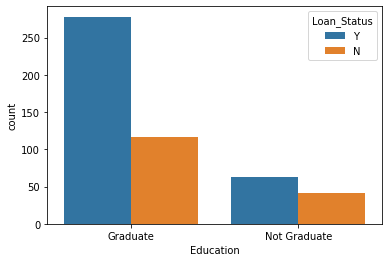

In [17]:
sns.countplot(x = "Education", hue = "Loan_Status" , data = df)

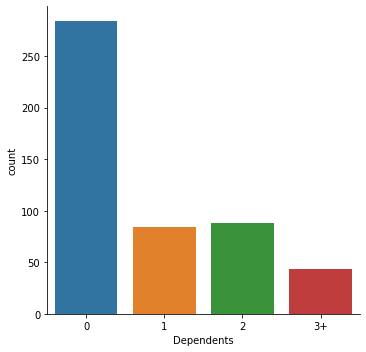

In [18]:
sns.catplot(x = "Dependents" , data = df, kind = "count")

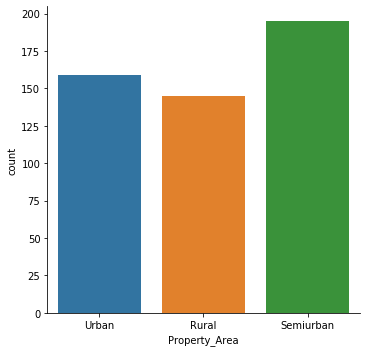

In [19]:
sns.catplot(x = "Property_Area" , data = df, kind = "count")

In [20]:
# Checking the values of the Dependents column

df["Dependents"].value_counts()

0     284
2      88
1      84
3+     43
Name: Dependents, dtype: int64

we will replace "3+" value with "3"

In [21]:
df["Dependents"] = df["Dependents"].replace(to_replace = "3+" , value = 3)

In [22]:
df["Dependents"].unique()

array(['0', '1', '2', 3], dtype=object)

In [23]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

We will do label encoding for the columns ("Gender" , "Married", "Dependents", "Education", "Self_Employed" , "Credit_History", "Property_Area" and "Loan_Status"

- 1 = Male & 0 = Female                         " Gender" column
- 1 = Yes  & 0 = No                             " Married" column 
- 1 = Grduated & 0 = Not Graduated             " Education" column
- 1= Yes & 0 = No                              " Self_Employed" column
- 2 = Urban & 1 = Semiurban & 0 = Rural        " Property_Area" column
- 1 = Y & 0 = N                                " Loan_Status" column


In [24]:
df.replace({"Gender": {"Male":1, "Female" :0}, "Married": {"Yes": 1, "No" : 0}, "Education": {"Graduate" : 1, "Not Graduate" :0}, 
          "Self_Employed": {"Yes" : 1, "No": 0}, "Property_Area": {"Urban": 2, "Semiurban":1, "Rural":0}, "Loan_Status" : {"Y":1 , "N":0}}, inplace = True)

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1,2,1


In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1,2,1


find the correlation and visualize it 

In [27]:
correlation = df.corr()

In [28]:
correlation

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
Gender,1.000000,0.354135,-0.056193,-0.012669,0.030916,0.157223,0.097827,-0.089505,-0.003580,0.058060
Married,0.354135,1.000000,-0.004890,0.014580,0.036856,0.105889,0.180136,-0.111472,0.031818,0.104630
Education,-0.056193,-0.004890,1.000000,0.019735,0.139300,0.069365,0.167210,0.115226,0.037432,0.085597
Self_Employed,-0.012669,0.014580,0.019735,1.000000,0.167754,-0.009958,0.117841,-0.028566,-0.059065,-0.026862
ApplicantIncome,0.030916,0.036856,0.139300,0.167754,1.000000,-0.114489,0.489994,-0.007663,-0.065665,-0.044570
CoapplicantIncome,0.157223,0.105889,0.069365,-0.009958,-0.114489,1.000000,0.189615,-0.008559,0.007918,-0.042535
LoanAmount,0.097827,0.180136,0.167210,0.117841,0.489994,0.189615,1.000000,0.050145,-0.106832,-0.070230
Loan_Amount_Term,-0.089505,-0.111472,0.115226,-0.028566,-0.007663,-0.008559,0.050145,1.000000,-0.068523,0.004116
Property_Area,-0.003580,0.031818,0.037432,-0.059065,-0.065665,0.007918,-0.106832,-0.068523,1.000000,0.018960
Loan_Status,0.058060,0.104630,0.085597,-0.026862,-0.044570,-0.042535,-0.070230,0.004116,0.018960,1.000000


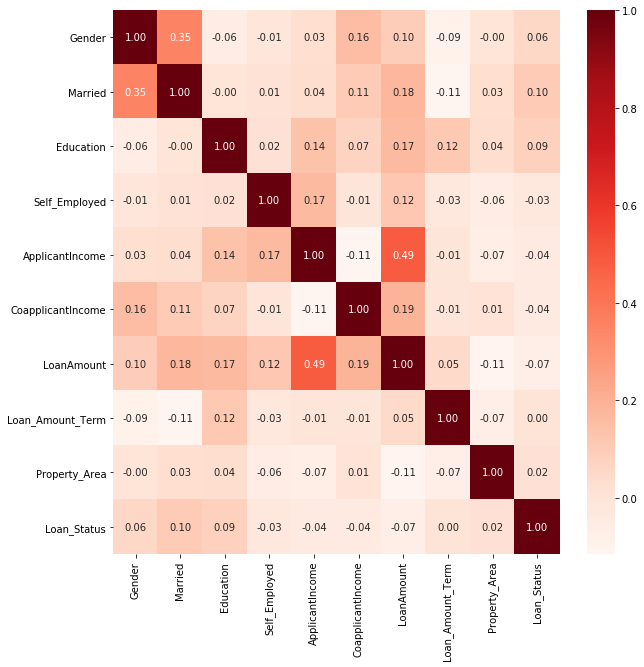

In [29]:
# Visulaize the correlation 

fig , ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlation , cbar = True, cmap = "Reds", annot = True, fmt = ".2f")

separate the data 

In [30]:
X = df.iloc[:, 1:-1]

In [31]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1,2


In [32]:
y = df.iloc[:,-1]

In [33]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 499, dtype: int64

In [34]:
print(X.shape, y.shape)

(499, 11) (499,)


In [35]:
# Preprocessing 

sc = StandardScaler()
X = sc.fit_transform(X)

In [36]:
X[:10]

array([[ 0.46272229, -1.3606721 , -0.76383834,  0.51311903, -0.40058097,
         0.09137986, -0.60774736,  0.02044781,  0.27761216,  0.41727407,
         1.24604986],
       [ 0.46272229,  0.73493092,  0.21599542,  0.51311903, -0.40058097,
        -0.13418707, -0.02288108, -0.21297527,  0.27761216,  0.41727407,
        -1.31798676],
       [ 0.46272229,  0.73493092, -0.76383834,  0.51311903,  2.49637418,
        -0.41623482, -0.60774736, -0.99899   ,  0.27761216,  0.41727407,
         1.24604986],
       [ 0.46272229,  0.73493092, -0.76383834, -1.94886555, -0.40058097,
        -0.49053293,  0.30678492, -0.31439652,  0.27761216,  0.41727407,
         1.24604986],
       [ 0.46272229, -1.3606721 , -0.76383834,  0.51311903, -0.40058097,
         0.11828397, -0.60774736, -0.04816572,  0.27761216,  0.41727407,
         1.24604986],
       [ 0.46272229,  0.73493092,  1.19582917,  0.51311903,  2.49637418,
         0.01440916,  1.01963917,  1.54921906,  0.27761216,  0.41727407,
         1.246

we will train, test and split our data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [38]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(399, 11) (100, 11) (399,) (100,)


Training the model 

In [39]:
svc_model = SVC(kernel = "linear")

In [40]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
# accuracy score on training data
print(svc_model.score(X_train, y_train))

0.7994987468671679


In [42]:
# accuracy score on test data
print(svc_model.score(X_test, y_test))

0.82


In [43]:
# predicting the data 

y_pred = svc_model.predict(X_test)

In [44]:
# accuracy score on the predicted data
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.82

making a predictive system 

In [47]:
input_data = (1,0,0,1,0,6000,0.0,141.000000,360.0,1,2)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardize the input data
std_data = sc.transform(input_data_reshaped)

prediction = svc_model.predict(std_data)
print(prediction)

if prediction == 1 :
    print("The loan is accepted")
else :
    print("The loan is not accepted")

[1]
The loan is accepted
